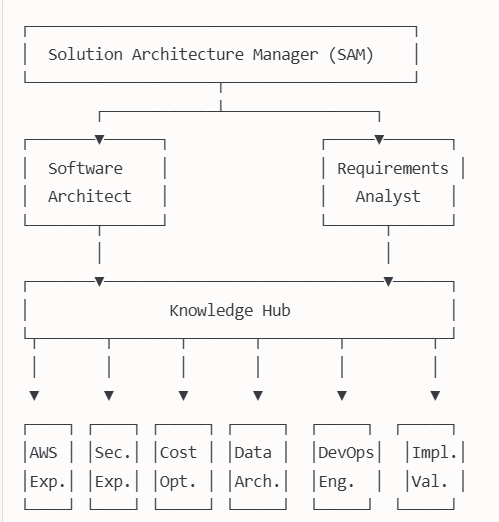

## To Do : 

* Check Crew AI documentation for complex architectures & needs and refine everything

* Remove the internet search from some tools

* How to attach the custom tools to the tasks & agents




* @tool("Architecture Diagram Generator")
* @tool("AWS Cost Estimator")
* @tool("IaC Template Generator")

## Current Architecture

In [8]:
from crewai_tools import SerperDevTool
from dotenv import load_dotenv

load_dotenv()
search_tool = SerperDevTool()

search_query = "latest advancements in artificial intelligence 2024"
search_results = search_tool.run(search_query=search_query)

# Print the results
print("Search Query:", search_query)
print("\nResults Summary:")
print(search_results)


Using Tool: Search the internet with Serper
Search Query: latest advancements in artificial intelligence 2024

Results Summary:
{'searchParameters': {'q': 'latest advancements in artificial intelligence 2024', 'type': 'search', 'num': 10, 'engine': 'google'}, 'organic': [{'title': '6 Game-Changing AI Breakthroughs That Defined 2024 - Forbes', 'link': 'https://www.forbes.com/sites/bernardmarr/2024/12/16/6-game-changing-ai-breakthroughs-that-defined-2024/', 'snippet': "From Apple's entry into generative AI to unprecedented achievements in robotics and art, 2024 marked a transformative year in artificial intelligence ...", 'position': 1}, {'title': 'Generative AI Developments & Trends in 2024: A Timeline', 'link': 'https://www.channelinsider.com/managed-services/generative-ai-developments-trends-year-in-review/', 'snippet': 'Discover key milestones and advancements in generative AI for 2024, highlighting innovations and trends that will shape the future of artificial intelligence.', 'posi

In [4]:
from crewai import Agent, Task, Crew, Process, LLM
from crewai_tools import SerperDevTool
from crewai.tools import tool
from dotenv import load_dotenv
import re
import json

# Load environment variables for API keys
load_dotenv()

# Initialize tools
search_tool = SerperDevTool()


In [7]:
# Define the hierarchical manager agent
project_manager = Agent(
    role="Project Manager",
    goal="Orchestrate the creation of a detailed, implementation-ready AWS architecture and manage the specialist team",
    backstory=(
        "You are a seasoned technical project manager with 15+ years of experience leading complex AWS projects. "
        "You excel at coordinating specialist teams, synthesizing diverse inputs, and ensuring "
        "the final deliverable meets all customer requirements while maintaining practical "
        "implementability. You have a track record of delivering solutions on time and within budget."
    ),
    verbose=True,
    allow_delegation=True,
    llm=LLM(model="ollama/crewai-llama3.3", base_url="http://localhost:11434")
)


# Define the requirements assessment agent
requirements_analyst = Agent(
    role="Requirements Analyst",
    goal="Analyze project requirements and determine technical needs for {use_case}",
    backstory=(
        "You are a senior technical business analyst who specializes in translating business "
        "requirements into technical specifications. You excel at identifying which "
        "technical aspects will be crucial for project success and can accurately analyze "
        "the technical implications of business requirements."
    ),
    verbose=True,
    allow_delegation=True,
    llm=LLM(model="ollama/crewai-llama3.3", base_url="http://localhost:11434")
)


# Define the specialist agents (will be conditionally included based on requirements analysis)
software_architect = Agent(
    role="Software Architecture Specialist",
    goal="Design the optimal software architecture pattern for {use_case} before cloud implementation",
    backstory=(
        "You are an expert software architect with deep knowledge of architecture patterns (microservices, "
        "monolithic, serverless, event-driven, etc). You understand how to match business requirements to "
        "architectural approaches, considering factors like development velocity, team expertise, "
        "scalability needs, and integration complexity. You specialize in designing systems that can be "
        "effectively implemented on AWS."
    ),
    tools=[search_tool],
    verbose=True,
    allow_delegation=True,
    llm=LLM(model="ollama/crewai-llama3.3", base_url="http://localhost:11434")
)

aws_expert = Agent(
    role="AWS Solution Specialist",
    goal="Recommend optimal AWS services and configurations for implementing {use_case}",
    backstory=(
        "You are an AWS-certified solutions architect with extensive hands-on experience. "
        "You have deep knowledge of AWS services, their limitations, pricing models, and best practices. "
        "You specialize in selecting the right AWS services that align with both technical requirements "
        "and business constraints, paying particular attention to the specific parameters of {use_case}."
    ),
    tools=[search_tool],
    verbose=True,
    allow_delegation=True,
    llm=LLM(model="ollama/crewai-llama3.3", base_url="http://localhost:11434")
)

security_expert = Agent(
    role="Security & Compliance Architect",
    goal="Design secure AWS architectures that meet {security_tier} requirements and {compliance} standards",
    backstory=(
        "You are an AWS security specialist with certifications in security engineering and compliance. "
        "You understand how to implement defense-in-depth strategies across AWS services and have "
        "experience implementing architectures that satisfy regulatory requirements like {compliance}. "
        "You focus on practical security implementations rather than theoretical guidelines."
    ),
    tools=[search_tool],
    verbose=True,
    allow_delegation=True,
    llm=LLM(model="ollama/crewai-llama3.3", base_url="http://localhost:11434")
)

cost_specialist = Agent(
    role="Cost Optimization Specialist",
    goal="Optimize the architecture for {cost_profile} while maintaining required performance",
    backstory=(
        "You specialize in AWS cost optimization with experience in FinOps practices. "
        "You understand how to balance performance requirements with cost constraints, "
        "identifying opportunities for reserved instances, spot fleets, graviton processors, "
        "and other cost-saving approaches. You have deep knowledge of AWS pricing models and "
        "can forecast costs for different implementation scenarios."
    ),
    tools=[search_tool],
    verbose=True,
    allow_delegation=True,
    llm=LLM(model="ollama/crewai-llama3.3", base_url="http://localhost:11434")
)

data_architect = Agent(
    role="Data Flow Architect",
    goal="Design efficient data flows and storage solutions for {use_case}",
    backstory=(
        "You are a data architect specializing in designing scalable data pipelines and storage solutions. "
        "You understand AWS data services (RDS, DynamoDB, S3, Kinesis, etc.) and when to apply them. "
        "You excel at designing architectures that handle data efficiently while maintaining data integrity, "
        "considering aspects like data volume, velocity, and variety for {use_case}."
    ),
    tools=[search_tool],
    verbose=True,
    allow_delegation=True,
    llm=LLM(model="ollama/crewai-llama3.3", base_url="http://localhost:11434")
)

devops_engineer = Agent(
    role="DevOps Specialist",
    goal="Design CI/CD pipelines and operational processes for {use_case} implementation",
    backstory=(
        "You are a DevOps expert with experience implementing Infrastructure as Code and CI/CD pipelines on AWS. "
        "You understand AWS deployment services (CodePipeline, CodeBuild, etc.) and operational tools "
        "(CloudWatch, X-Ray, etc.). You focus on creating automated, repeatable deployment processes "
        "that enable reliable operation of {use_case} solutions."
    ),
    tools=[search_tool],
    verbose=True,
    allow_delegation=True,
    llm=LLM(model="ollama/crewai-llama3.3", base_url="http://localhost:11434")
)

integration_specialist = Agent(
    role="Integration Specialist",
    goal="Design integration architecture for {use_case} with {integration_complexity} requirements",
    backstory=(
        "You are an integration specialist with extensive experience connecting different systems and "
        "services. You excel at designing APIs, webhooks, event buses, and other integration patterns "
        "that enable seamless communication between application components and external systems. "
        "You understand how to balance performance, reliability, and complexity to create "
        "integration architectures that match the {integration_complexity} requirements."
    ),
    tools=[search_tool],
    verbose=True,
    allow_delegation=True,
    llm=LLM(model="ollama/crewai-llama3.3", base_url="http://localhost:11434")
)

implementation_validator = Agent(
    role="Implementation Validator",
    goal="Critically review the proposed architecture against AWS best practices and specific requirements",
    backstory=(
        "You are an AWS Well-Architected Framework specialist who reviews architectures for alignment with "
        "best practices and specific requirements. You're skilled at identifying gaps, overengineering, "
        "and optimization opportunities in AWS designs. You provide actionable feedback that improves "
        "architectures while remaining practical for implementation."
    ),
    tools=[search_tool],
    verbose=True,
    allow_delegation=True,
    llm=LLM(model="ollama/crewai-llama3.3", base_url="http://localhost:11434")
)

solution_architect = Agent(
    role="Solution Architecture Integrator",
    goal="Synthesize all specialist inputs into a comprehensive, implementation-ready architecture document for {use_case}",
    backstory=(
        "You are a Principal Solutions Architect with expertise in creating comprehensive AWS implementation guides. "
        "You excel at taking detailed inputs from various specialists and crafting them into a cohesive, comprehensive document "
        "that preserves each specialist's unique contributions while creating a coherent implementation guide. "
        "Your architecture documents are known for their clarity, completeness, practical implementability, "
        "and for faithfully representing the expertise and recommendations from each specialist domain."
    ),
    verbose=True,
    allow_delegation=True,
    llm=LLM(model="ollama/crewai-llama3.3", base_url="http://localhost:11434")
)

# Task 1: Initial Requirements Analysis
task_analyze_requirements = Task(
    description=(
        "As the first step in this architecture design process, analyze the complete set of project requirements to determine technical needs.\n\n"
        "STEP 1: Format the requirements as follows and analyze them:\n"
        "- use_case: {use_case}\n"
        "- performance: {performance}\n"
        "- availability: {availability}\n"
        "- security_tier: {security_tier}\n"
        "- compliance: {compliance}\n"
        "- cost_profile: {cost_profile}\n"
        "- implementation_time: {implementation_time}\n"
        "- required_expertise: {required_expertise}\n"
        "- scalability: {scalability}\n"
        "- ease_of_implementation: {ease_of_implementation}\n"
        "- integration_complexity: {integration_complexity}\n\n"

        "STEP 2: Provide a comprehensive analysis of the requirements, detailing the technical implications "
        "and challenges associated with implementing this system on AWS.\n\n"
        "STEP 3: Explicitly rate the following aspects on a scale of 1-5:\n"
        "1. software_architecture_complexity: How complex is the software architecture needs?\n"
        "2. security_requirements: How important are security and compliance?\n"
        "3. cost_optimization_needs: How critical is cost optimization?\n"
        "4. data_complexity: How complex are the data handling requirements?\n"
        "5. devops_complexity: How sophisticated are the deployment and operations needs?\n"
        "6. performance_requirements: How demanding are the performance needs?\n"
        "7. availability_requirements: How high are the availability requirements?\n"
        "8. integration_complexity: How complex are the integration requirements?\n\n"
        "For each area, provide a score from 1-5 where:\n"
        "1 = Not important/minimal requirements\n"
        "3 = Moderately important/standard requirements\n"
        "5 = Critically important/complex requirements\n\n"
        "YOUR RESPONSE MUST INCLUDE the complexity ratings in the following format (this is absolutely required):\n\n"
        "<assessment_scores>\n"
        "{\n"
        "  \"software_architecture_complexity\": X,\n"
        "  \"security_requirements\": X,\n"
        "  \"cost_optimization_needs\": X,\n"
        "  \"data_complexity\": X,\n"
        "  \"devops_complexity\": X,\n"
        "  \"performance_requirements\": X,\n"
        "  \"availability_requirements\": X,\n"
        "  \"integration_complexity\": X\n"
        "}\n"
        "</assessment_scores>\n"
    ),
    expected_output=(
        "A comprehensive requirements analysis that details the technical requirements, key challenges, "
        "and overall project complexity for implementing the {use_case} on AWS, with explicit complexity "
        "ratings (1-5) for each technical aspect enclosed in <assessment_scores> tags."
    ),
    agent=requirements_analyst
)

# Task 2: Project Planning and Team Coordination
task_project_planning = Task(
    description=(
        "Based on the requirements analysis from the Requirements Analyst, create a detailed project plan for developing "
        "the AWS architecture recommendation for {use_case}.\n\n"
        "IMPORTANT - EXECUTION PLAN:\n"
        "1. You MUST start by reviewing the output from task_analyze_requirements which contains complexity scores.\n"
        "2. Based on these complexity scores, you will decide which specialists to involve and in what order:\n\n"
        "Specialist assignment rules:\n"
        "- Always involve the AWS Solution Specialist for core service selection\n"
        "- If software_architecture_complexity >= 3, involve the Software Architecture Specialist before AWS service selection\n"
        "- If security_requirements >= 3, involve the Security & Compliance Architect after AWS service selection\n"
        "- If cost_optimization_needs >= 3, involve the Cost Optimization Specialist after AWS service selection\n"
        "- If data_complexity >= 3, involve the Data Flow Architect after AWS service selection\n"
        "- If devops_complexity >= 3, involve the DevOps Specialist after initial services are selected\n"
        "- If integration_complexity >= 3, involve the Integration Specialist after core services are defined\n"
        "- Always involve the Implementation Validator for architecture validation near the end\n"
        "- Always involve the Solution Architecture Integrator for final synthesis\n\n"
        "For specialists with scores < 3, explain why they won't be deeply involved, but you can assign them lightweight consulting roles if needed.\n\n"
        "The plan should include:\n"
        "1. Team composition - which specialists will be involved based on the complexity scores\n"
        "2. Work breakdown structure - what tasks each specialist will perform\n"
        "3. Dependencies between specialist tasks\n"
        "4. Integration points where specialist outputs will be combined\n"
        "5. Timeline for the architecture development process\n"
        "6. Key deliverables expected from each specialist\n\n"
        "Also include a coordination plan detailing how you will manage the specialist team to ensure "
        "their outputs align and integrate properly into a cohesive architecture document."
    ),
    expected_output=(
        "A detailed project plan with team composition based on complexity scores, work breakdown structure, task dependencies, "
        "integration points, timeline, and key deliverables, plus a coordination strategy. This will guide the execution flow."
    ),
    agent=project_manager,
    context=[task_analyze_requirements]
)

# Task 3: Software Architecture Design (Conditional)
task_design_software_architecture = Task(
    description=(
        "Design the optimal software architecture pattern for {use_case} based on the requirements analysis.\n"
        "Consider whether the solution should use:\n"
        "1. Monolithic architecture vs. microservices\n"
        "2. Serverless vs. container-based approaches\n"
        "3. Event-driven vs. request-response patterns\n"
        "4. Data storage approaches (SQL, NoSQL, data lake)\n"
        "5. Integration patterns with existing systems\n\n"
        "Use the search tool to conduct multiple specific searches for each decision point, such as:\n"
        "- \"microservices vs monolithic for {use_case} with {performance} performance needs\"\n"
        "- \"serverless architecture patterns for {use_case} with {scalability} scalability requirements\"\n"
        "- \"event-driven architecture for {use_case} with {integration_complexity} integration needs\"\n\n"
        "Important: Make separate, focused searches for each architectural decision rather than one general search.\n\n"
        "For each architectural decision:\n"
        "1. Explain the rationale based on specific requirements\n"
        "2. Identify implications for AWS implementation\n"
        "3. Describe how it addresses {performance}, {scalability}, and {ease_of_implementation} needs\n"
        "4. Detail how it aligns with {required_expertise} expertise level\n\n"
    ),
    expected_output=(
        "A detailed software architecture design document that includes:\n"
        "- Selection of appropriate architectural patterns with rationale\n"
        "- Component diagrams showing system structure\n"
        "- Data flow diagrams showing information movement\n"
        "- Integration approach with existing systems\n"
        "- Clear mapping between requirements and architectural decisions"
    ),
    agent=software_architect,
    context=[task_analyze_requirements, task_project_planning],
    tools=[search_tool]
)

# Task 4: AWS Service Selection
task_aws_service_selection = Task(
    description=(
        "Based on the project requirements and software architecture design, select the optimal AWS services to implement {use_case}.\n"
        "For each component in the architecture:\n"
        "1. Use the search tool to search for AWS service recommendations with specific requirements, such as:\n"
        "   - \"high-performance database for {use_case} with {performance} needs and {availability} availability\"\n"
        "   - \"compute solution for {use_case} with {scalability} scalability requirements\"\n"
        "   - \"storage solution for {use_case} with {cost_profile} cost profile\"\n\n"
        "2. Important: Make separate, focused searches for each major component rather than one general search.\n\n"
        "3. For each AWS service recommended:\n"
        "   - Detail specific instance types, sizes, and configurations to meet requirements\n"
        "   - Explain how it integrates with other selected services\n"
        "   - Identify any alternatives considered and why they were rejected\n"
        "   - Provide sizing and capacity recommendations based on the use case scale\n\n"
        "The output should be a comprehensive AWS service mapping for each architecture component with specific configuration details."   
    ),
    expected_output=(
        "A detailed AWS service selection document that includes:\n"
        "- Specific AWS services mapped to architecture components\n"
        "- Service configuration details and parameters\n"
        "- Integration approach between services\n"
        "- Cost estimates aligned with {cost_profile} requirements\n"
        "- Rationale for each selection tied to specific requirements"
    ),
    agent=aws_expert,
    context=[task_analyze_requirements, task_project_planning, task_design_software_architecture],
    tools=[search_tool]
)

# Task 5: Security & Compliance Architecture (Conditional)
task_security_architecture = Task(
    description=(
        "Design the security architecture for the {use_case} implementation to meet {security_tier} and {compliance} requirements.\n"
        "For each AWS service in the proposed architecture:\n"
        "1. Define IAM roles, policies, and permissions using least privilege principles\n"
        "2. Design network security with security groups, NACLs, and VPC architecture\n"
        "3. Specify encryption requirements for data at rest and in transit\n"
        "4. Detail authentication and authorization mechanisms\n"
        "5. Design logging, monitoring, and alerting for security events\n"
        "6. Document how the architecture meets {compliance} requirements\n\n"
        "Use the search tool to find specific information about AWS security best practices for each service and compliance requirement.\n\n"
        "Include specific configurations and policies required for implementation."
    ),
    expected_output=(
        "A comprehensive security architecture document that includes:\n"
        "- IAM configuration with actual policy JSON\n"
        "- Network security architecture with diagrams\n"
        "- Encryption implementation details\n"
        "- Authentication and authorization design\n"
        "- Security monitoring approach\n"
        "- Compliance mapping showing how requirements are satisfied"
    ),
    agent=security_expert,
    context=[task_analyze_requirements, task_project_planning, task_design_software_architecture, task_aws_service_selection],
    tools=[search_tool]
)

# Task 6: Cost Optimization Design (Conditional)
task_cost_optimization = Task(
    description=(
        "Optimize the proposed AWS architecture for {cost_profile} requirements while maintaining {performance} and {availability} needs.\n"
        "For each AWS service in the architecture:\n"
        "1. Recommend specific pricing models (on-demand, reserved, savings plans, spot)\n"
        "2. Suggest cost-effective instance types and sizes\n"
        "3. Design auto-scaling approaches to optimize costs\n"
        "4. Identify opportunities for serverless implementations to reduce costs\n"
        "5. Design data transfer optimization to minimize network costs\n"
        "6. Recommend operational practices for cost control\n\n"
        "Use the search tool to find specific cost optimization recommendations for each AWS service in your architecture.\n\n"
        "Provide a detailed cost estimate with breakdown by service."
    ),
    expected_output=(
        "A detailed cost optimization plan that includes:\n"
        "- Specific pricing model recommendations for each service\n"
        "- Instance type and size selections with rationale\n"
        "- Auto-scaling design for cost efficiency\n"
        "- Data transfer optimization approach\n"
        "- Monthly cost estimates with breakdown\n"
        "- Cost control and governance recommendations"
    ),
    agent=cost_specialist,
    context=[task_analyze_requirements, task_project_planning, task_aws_service_selection],
    tools=[search_tool]
)

# Task 7: Data Architecture Design (Conditional)
task_data_architecture = Task(
    description=(
        "Design the data architecture for {use_case} that optimizes data flow, storage, and processing.\n"
        "For the proposed AWS implementation:\n"
        "1. Define data models and schema designs for all data stores\n"
        "2. Design data ingestion, processing, and analytics pipelines\n"
        "3. Specify data retention, backup, and disaster recovery approaches\n"
        "4. Detail data security and privacy implementations for {compliance}\n"
        "5. Design caching strategies for {performance} requirements\n"
        "6. Optimize data storage for {cost_profile} requirements\n\n"
        "Use the search tool to research best practices for data architecture in AWS for your specific use case and requirements.\n\n"
        "Include data flow diagrams and specific AWS service configurations."
    ),
    expected_output=(
        "A comprehensive data architecture document that includes:\n"
        "- Data models and schema designs\n"
        "- Data pipeline architecture diagrams\n"
        "- Storage configuration details\n"
        "- Backup and DR approach\n"
        "- Data security implementation\n"
        "- Performance optimization strategies"
    ),
    agent=data_architect,
    context=[task_analyze_requirements, task_project_planning, task_design_software_architecture, task_aws_service_selection, task_security_architecture],
    tools=[search_tool]
)

# Task 8: DevOps & Implementation Plan (Conditional)
task_devops_implementation = Task(
    description=(
        "Design the DevOps processes and implementation plan for deploying {use_case} within {implementation_time} timeline.\n"
        "For the proposed AWS architecture:\n"
        "1. Create Infrastructure as Code templates (CloudFormation or Terraform)\n"
        "2. Design CI/CD pipeline for automated deployment\n"
        "3. Define monitoring, alerting, and logging strategy\n"
        "4. Create runbooks for common operational procedures\n"
        "5. Detail implementation phases and timeline\n"
        "6. Specify required team resources and skills\n\n"
        "Use the search tool to research DevOps best practices and implementation patterns specific to your AWS architecture.\n\n"
        "Include actual code snippets and configuration files."
    ),
    expected_output=(
        "A detailed DevOps and implementation plan that includes:\n"
        "- IaC templates with actual code\n"
        "- CI/CD pipeline configuration\n"
        "- Monitoring setup with CloudWatch configurations\n"
        "- Operational runbooks\n"
        "- Implementation timeline with phases\n"
        "- Team resource plan"
    ),
    agent=devops_engineer,
    context=[task_analyze_requirements, task_project_planning, task_aws_service_selection],
    tools=[search_tool]
)

# Task 9: Design Integration Architecture
task_integration_architecture = Task(
    description=(
        "Design the integration architecture for {use_case} with {integration_complexity} complexity requirements.\n"
        "For the proposed AWS implementation:\n"
        "1. Define APIs, webhooks, and event patterns needed for system integration\n"
        "2. Specify AWS services for integration (API Gateway, EventBridge, etc.)\n"
        "3. Design authentication and authorization for integration points\n"
        "4. Create message schemas and contracts for system communication\n"
        "5. Detail error handling and retry strategies\n"
        "6. Define monitoring approach for integration points\n\n"
        "Use the search tool to research integration patterns and AWS services that are appropriate for your specific integration requirements.\n\n"
        "Include integration architecture diagrams and specific AWS service configurations."
    ),
    expected_output=(
        "A comprehensive integration architecture document that includes:\n"
        "- API specifications and designs\n"
        "- Event patterns and message schemas\n"
        "- Authentication and authorization approach\n"
        "- Error handling and resilience patterns\n"
        "- AWS service configurations for integration components\n"
        "- Integration monitoring strategy"
    ),
    agent=integration_specialist,
    context=[task_analyze_requirements, task_project_planning, task_aws_service_selection],
    tools=[search_tool]
)


# Task 10: Progress Review and Integration (Manager Task)
task_progress_review = Task(
    description=(
        "Review the outputs from all specialist teams and identify any gaps, inconsistencies, or integration issues.\n"
        "For each specialist deliverable:\n"
        "1. Ensure it aligns with the original requirements for {use_case}\n"
        "2. Verify it integrates properly with other specialist outputs\n"
        "3. Identify any missing details or inconsistencies\n"
        "4. Provide feedback to specialists for revisions if needed\n\n"
        "Also evaluate overall progress against the project plan and timeline, making adjustments as necessary."
    ),
    expected_output=(
        "A comprehensive progress review report that identifies integration issues, gaps, and inconsistencies, "
        "with specific feedback for each specialist and revised project plan if needed."
    ),
    agent=project_manager,
    context=[
        task_analyze_requirements, 
        task_project_planning, 
        task_design_software_architecture,
        task_aws_service_selection, 
        task_security_architecture, 
        task_cost_optimization, 
        task_data_architecture, 
        task_devops_implementation,
        task_integration_architecture
    ])

# Task 11: Architecture Validation
task_architecture_validation = Task(
    description=(
        "Validate the complete architecture against AWS Well-Architected Framework principles and specific requirements for {use_case}.\n"
        "For the proposed architecture:\n"
        "1. Evaluate operational excellence aspects\n"
        "2. Validate security implementation against {security_tier} requirements\n"
        "3. Assess reliability for meeting {availability} needs\n"
        "4. Review performance efficiency for {performance} requirements\n"
        "5. Analyze cost optimization for {cost_profile}\n"
        "6. Verify implementation feasibility for {required_expertise} team\n\n"
        "Use the search tool to research AWS Well-Architected Framework principles and best practices specific to your architecture components.\n\n"
        "Identify specific improvements with implementation details."
    ),
    expected_output=(
        "A comprehensive validation report that includes:\n"
        "- Well-Architected Framework assessment\n"
        "- Gap analysis against requirements\n"
        "- Specific improvement recommendations\n"
        "- Implementation risks and mitigations\n"
        "- Validation of feasibility for the target team\n"
        "- Final architecture recommendations"
    ),
    agent=implementation_validator,
    context=[task_aws_service_selection, task_progress_review],
    tools=[search_tool]
)

# Task 12: Final Architecture Synthesis
task_final_synthesis = Task(
    description=(
        "Synthesize all architectural inputs into a comprehensive, implementation-ready AWS architecture document for {use_case}.\n\n"
        "IMPORTANT: You MUST carefully review and incorporate the detailed outputs from EACH specialist to ensure their "
        "expertise, best practices research, and specialized recommendations are fully represented in the final document.\n\n"
        "The document must include:\n\n"
        "1. Executive Summary\n"
        "   - Overview of business requirements for {use_case}\n"
        "   - High-level architecture approach\n"
        "   - Key benefits and alignment with requirements\n\n"
        
        "2. Software Architecture (from Software Architecture Specialist)\n"
        "   - Detailed explanation of selected architecture pattern (microservices, serverless, etc.)\n"
        "   - Component diagrams with clear relationships\n"
        "   - Justification linking architecture decisions to specific requirements ({performance}, {scalability}, etc.)\n"
        "   - Best practices incorporated from research\n\n"
        
        "3. AWS Service Implementation (from AWS Solution Specialist)\n"
        "   - Detailed service selection with SPECIFIC configurations, not just service names\n"
        "   - Instance types, sizes, and configurations with rationale\n"
        "   - Service integration patterns and data flows\n"
        "   - Service limits and scaling considerations\n"
        "   - Alternatives considered and rejection rationale\n\n"
        
        "4. Security Architecture (from Security & Compliance Architect)\n"
        "   - Detailed IAM policies and roles with actual JSON examples\n"
        "   - Network security architecture with security groups and NACL details\n"
        "   - Encryption implementation specifics for each service\n"
        "   - Specific {compliance} requirement mapping to implementations\n"
        "   - Security monitoring configurations\n\n"
        
        "5. Cost Optimization (from Cost Optimization Specialist)\n"
        "   - Specific pricing models for each service (On-Demand/Reserved/Savings Plans/Spot)\n"
        "   - Auto-scaling configurations for cost efficiency\n"
        "   - Detailed monthly cost breakdown by service\n"
        "   - Operational cost control mechanisms\n\n"
        
        "6. Data Architecture (from Data Flow Architect)\n"
        "   - Detailed data models and schema designs\n"
        "   - Data flow diagrams with service integration\n"
        "   - Performance optimization strategies for data access\n"
        "   - Backup and disaster recovery implementations\n\n"
        
        "7. DevOps Implementation (from DevOps Specialist)\n"
        "   - Infrastructure as Code examples (CloudFormation/Terraform)\n"
        "   - CI/CD pipeline configurations with tool selection\n"
        "   - Monitoring setup with CloudWatch alarm configurations\n"
        "   - Operational runbooks for common procedures\n\n"
        
        "8. Integration Architecture (from Integration Specialist)\n"
        "   - API specifications with endpoint details\n"
        "   - Event patterns and message schemas\n"
        "   - Authentication and authorization implementations\n"
        "   - Error handling and resilience patterns\n\n"
        
        "9. Implementation Roadmap\n"
        "   - Phased implementation plan with timeline\n"
        "   - Resource requirements and team composition\n"
        "   - Risks and mitigation strategies\n\n"
        
        "10. Validation & Compliance\n"
        "    - Well-Architected Framework assessment results\n"
        "    - Compliance validation for {compliance} requirements\n"
        "    - Performance verification for {performance} needs\n"
        "    - Availability design validation for {availability} requirements\n\n"
        
        "11. Reference Implementation\n"
        "    - Code snippets and configuration files\n"
        "    - Deployment instructions\n\n"
        
        "CRITICAL INSTRUCTIONS:\n"
        "1. PRESERVE SPECIALIST EXPERTISE: When incorporating specialist outputs, maintain their technical depth and specific recommendations. Do not generalize or simplify their expert insights.\n"
        "2. INCLUDE TECHNICAL SPECIFICS: For each area, include the actual configuration details, not just service names (e.g., specific instance types, IAM policies, scaling parameters).\n"
        "3. LINK TO REQUIREMENTS: Explicitly connect each implementation decision to the specific requirements it addresses ({performance}, {availability}, {security_tier}, etc.).\n"
        "4. HIGHLIGHT BEST PRACTICES: Include the best practices each specialist identified in their research.\n"
        "5. MAINTAIN TECHNICAL DEPTH: The document should be technically detailed enough to serve as an implementation guide for a {required_expertise} team.\n"
        "6. SEPARATE SPECIALIST CONTRIBUTIONS: Clearly attribute specific architecture components to the specialists who designed them, maintaining their unique expertise."
    ),
    expected_output=(
        "A comprehensive, technically detailed AWS architecture implementation document for {use_case} in Markdown format "
        "that faithfully represents each specialist's contributions and expertise, with specific implementation details, "
        "configuration examples, and best practices research. The document should preserve the technical depth from each "
        "specialist domain while creating a cohesive implementation guide that explicitly addresses all requirements.\n\n"
        "The final deliverable MUST be in proper Markdown format with structured headings (using # syntax), code blocks "
        "for all configuration examples, tables where appropriate for comparisons, and diagrams described in mermaid "
        "syntax when needed. This format ensures the document can be directly used as a professional consultation "
        "deliverable that's both human-readable and technically precise."
    ),
    agent=solution_architect,
    context=[
        task_analyze_requirements, 
        task_project_planning, 
        task_design_software_architecture,
        task_aws_service_selection, 
        task_security_architecture, 
        task_cost_optimization, 
        task_data_architecture, 
        task_devops_implementation,
        task_integration_architecture,
        task_progress_review,
        task_architecture_validation
    ]
)


def create_aws_architecture_recommendation(requirements):
    """
    Runs the CrewAI process to create an AWS architecture recommendation
    with all specialists included and the project manager controlling the process flow
    """
    # Package input parameters for easier passing
    use_case_params = {
        "use_case": requirements.get("use_case"),
        "performance": requirements.get("performance"),
        "availability": requirements.get("availability"),
        "security_tier": requirements.get("security_tier"),
        "compliance": ", ".join(requirements.get("compliance", [])) if isinstance(requirements.get("compliance"), list) else requirements.get("compliance", ""),
        "cost_profile": requirements.get("cost_profile"),
        "implementation_time": requirements.get("implementation_time"),
        "required_expertise": requirements.get("required_expertise"),
        "scalability": requirements.get("scalability"),
        "ease_of_implementation": requirements.get("ease_of_implementation"),
        "integration_complexity": requirements.get("integration_complexity", "Moderate")
    }
    
    # Create a single crew with all agents and tasks
    crew = Crew(
        agents=[
            project_manager, 
            requirements_analyst,
            software_architect, 
            aws_expert, 
            security_expert, 
            cost_specialist, 
            data_architect, 
            devops_engineer, 
            integration_specialist, 
            implementation_validator, 
            solution_architect
        ],
        tasks=[
            task_analyze_requirements,
            task_project_planning,
            task_design_software_architecture,
            task_aws_service_selection,
            task_security_architecture,
            task_cost_optimization,
            task_data_architecture,
            task_devops_implementation,
            task_integration_architecture,
            task_progress_review,
            task_architecture_validation,
            task_final_synthesis
        ],
        process=Process.hierarchical,
        manager=project_manager,
        manager_llm=LLM(model="ollama/crewai-llama3.3", base_url="http://localhost:11434"),
        verbose=True
    )
    
    print("Running AWS architecture design process with project manager coordination...")
    result = crew.kickoff(inputs=use_case_params)
    
    return {
        "architecture_recommendation": result
    }

# Example usage
if __name__ == "__main__":
    use_case_requirements = {
        "use_case": "e-commerce platform with 1M monthly users",
        "performance": "high",
        "availability": "99.99%",
        "security_tier": "high",
        "compliance": ["PCI-DSS"],
        "cost_profile": "balanced",
        "implementation_time": "3 months",
        "required_expertise": "intermediate",
        "scalability": "high",
        "ease_of_implementation": "medium",
        "integration_complexity": "Moderate"
    }
    
    # Pass the requirements dictionary directly to the function
    result = create_aws_architecture_recommendation(use_case_requirements)

    print("\n=== ARCHITECTURE RECOMMENDATION ===")
    print(result["architecture_recommendation"])

Running AWS architecture design process with project manager coordination...


╭──────────────────────────────────────────── Crew Execution Started ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Started                                                                                         │
│  Name: crew                                                                                                     │
│  ID: 604f3a0b-1e29-48cb-96e3-50b6f5fe9319                                                                       │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
└── 📋 Task: d114472e-5734-4bab-a187-25a89734d3c3
       Status: Executing Task...

🚀 Crew: crew
└── 📋 Task: d114472e-5734-4bab-a187-25a89734d3c3
       Status: Executing Task...
    └── 🤖 Agent: Crew Manager
            Status: In Progress

# Agent: Crew Manager
## Task: As the first step in this architecture design process, analyze the complete set of project requirements to determine technical needs.

STEP 1: Format the requirements as follows and analyze them:
- use_case: e-commerce platform with 1M monthly users
- performance: high
- availability: 99.99%
- security_tier: high
- compliance: PCI-DSS
- cost_profile: balanced
- implementation_time: 3 months
- required_expertise: intermediate
- scalability: high
- ease_of_implementation: medium
- integration_complexity: Moderate

STEP 2: Provide a comprehensive analysis of the requirements, detailing the technical implications and challenges associated with implementing this system on AWS.

STEP 3: Explicitly rate the following aspects on a scale of 1-5:
1. software_architecture_complexity: How complex is the software architecture needs?
2. security_requirements: How important are security and compliance?
3. cost_optimization_needs: How critical is cost optimization?
4. da

🤖 Agent: Crew Manager
    Status: In Progress

🚀 Crew: crew
└── 📋 Task: d114472e-5734-4bab-a187-25a89734d3c3
       Status: Executing Task...
    ├── 🤖 Agent: Crew Manager
    │       Status: In Progress
    └── 🤖 Agent: Requirements Analyst
            Status: In Progress

# Agent: Requirements Analyst
## Task: Analyze the project requirements for an e-commerce platform


# Agent: Requirements Analyst
## Final Answer: 
To analyze the project requirements for an e-commerce platform that serves 1M monthly users and meets specific criteria, we need to break down the requirements into key areas: performance, availability, security, compliance, cost, implementation time, expertise, scalability, ease of implementation, and integration complexity.

1. **Performance**: With 1M monthly users, high performance is crucial. This can be achieved by:
   - Utilizing a robust and scalable server architecture (e.g., cloud services like AWS or Azure) that can handle large volumes of traffic.
   - Implementing efficient database management systems (e.g., MySQL, MongoDB) optimized for e-commerce platforms.
   - Leveraging content delivery networks (CDNs) to reduce latency and enhance user experience.

2. **Availability**: A 99.99% availability requirement translates to less

🚀 Crew: crew
└── 📋 Task: d114472e-5734-4bab-a187-25a89734d3c3
       Status: Executing Task...
    ├── 🤖 Agent: Crew Manager
    │       Status: In Progress
    └── 🤖 Agent: Requirements Analyst
            Status: ✅ Completed



# Agent: Crew Manager
## Thought: Thought: To provide a comprehensive analysis of the requirements and rate the technical aspects, I need to first understand the project requirements in detail. The given requirements include an e-commerce platform with 1M monthly users, high performance, 99.99% availability, high security tier, PCI-DSS compliance, balanced cost profile, 3 months implementation time, intermediate required expertise, high scalability, medium ease of implementation, and moderate integration complexity.
## Using tool: Delegate work to coworker
## Tool Input: 
"{\"task\": \"Analyze the project requirements for an e-commerce platform\", \"context\": \"The platform has 1M monthly users, requires high performance, 99.99% availability, high security tier, PCI-DSS compliance, balanced cost profile, 3 months implementation time, intermediate required expertise, high scalability, medium ease of implementation, and moderate integration complexity.\", \"coworker\": \"Requirements 

🤖 Agent: Requirements Analyst
    Status: ✅ Completed
└── 🧠 Thinking...



LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.


Provider List: https://docs.litellm.ai/docs/providers



🚀 Crew: crew
└── 📋 Task: d114472e-5734-4bab-a187-25a89734d3c3
       Status: Executing Task...
    ├── 🤖 Agent: Crew Manager
    │       Status: In Progress
    └── 🤖 Agent: Requirements Analyst
            Status: ✅ Completed
        └── ❌ LLM Failed

╭─────────────────────────────────────────────────── LLM Error ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  ❌ LLM Call Failed                                                                                             │
│  Error: litellm.APIConnectionError: OllamaException - litellm.Timeout: Connection timed out after 600.0         │
│  seconds.                                                                                                       │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

2025-04-28 21:38:10,804 - 2660 - llm.py-llm:806 - ERROR: LiteLLM call failed: litellm.APIConnectionError: OllamaException - litellm.Timeout: Connection timed out after 600.0 seconds.


 Error during LLM call: litellm.APIConnectionError: OllamaException - litellm.Timeout: Connection timed out after 600.0 seconds.
 An unknown error occurred. Please check the details below.
 Error details: litellm.APIConnectionError: OllamaException - litellm.Timeout: Connection timed out after 600.0 seconds.


🚀 Crew: crew
└── 📋 Task: d114472e-5734-4bab-a187-25a89734d3c3
       Assigned to: Crew Manager
       Status: ❌ Failed
    ├── 🤖 Agent: Crew Manager
    │       Status: In Progress
    └── 🤖 Agent: Requirements Analyst
            Status: ✅ Completed
        └── ❌ LLM Failed

╭───────────────────────────────────────────────── Task Failure ──────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Failed                                                                                                    │
│  Name: d114472e-5734-4bab-a187-25a89734d3c3                                                                     │
│  Agent: Crew Manager                                                                                            │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────── Crew Failure ──────────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Failed                                                                                          │
│  Name: crew                                                                                                     │
│  ID: 604f3a0b-1e29-48cb-96e3-50b6f5fe9319                                                                       │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

APIConnectionError: litellm.APIConnectionError: OllamaException - litellm.Timeout: Connection timed out after 600.0 seconds.